In [ ]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import copy

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

In [ ]:
# create a model
net = nn.Sequential(
    nn.Linear(2,8), 
    nn.Linear(8,1),
    nn.Linear(1,1),
)

In [ ]:
# create the four networks

In [ ]:
# no random seed
net_noseed = copy.deepcopy(net)

# update the weights
for p in net_noseed.named_parameters():
    if 'weight' in p[0]:
        nn.init.xavier_normal_(p[1].data)
        

In [ ]:
# Random seed 1a
net_rs1a  = copy.deepcopy(net)

# set the seed to 1
torch.manual_seed(1)

# update the weights
for p in net_rs1a.named_parameters():
    if 'weight' in p[0]:
        nn.init.xavier_normal_(p[1].data)
        

In [ ]:
# Random seed 2
net_rs2  = copy.deepcopy(net)

# set the seed to 1
torch.manual_seed(2)

# update the weights
for p in net_rs2.named_parameters():
    if 'weight' in p[0]:
        nn.init.xavier_normal_(p[1].data)

In [ ]:
# Random seed 1b
net_rs1b  = copy.deepcopy(net)

# set the seed to 1
torch.manual_seed(1)

# update the weights
for p in net_rs1b.named_parameters():
    if 'weight' in p[0]:
        nn.init.xavier_normal_(p[1].data)

# Extract all weights from all network

In [ ]:
# initialize empty arrays
w_ns = np.array([])
w_1a = np.array([])
w_2 = np.array([])
w_1b = np.array([])

# loop over layers in the model
for i in range(3):
    # extract the vectorized weights matrix
    w_ns = np.append(w_ns,net_noseed[i].weight.view(-1).detach().numpy())
    w_1a = np.append(w_1a,net_rs1a[i].weight.view(-1).detach().numpy())
    w_2 = np.append(w_2,net_rs2[i].weight.view(-1).detach().numpy())
    w_1b = np.append(w_1b,net_rs1b[i].weight.view(-1).detach().numpy())

# check the vector
w_ns


array([ 0.12194457,  0.22122155,  0.2015125 ,  0.34797826,  0.47763139,
        0.92497092,  0.29024377,  0.09232274, -0.65633333, -0.68982708,
       -0.34514832,  0.04792053,  0.32508129, -0.08801569, -0.09943557,
        0.54550874, -0.11026949,  0.36617258, -0.30582535, -0.92524844,
       -0.02243244,  0.08332486,  0.13814196, -0.54890954, -0.47913137])

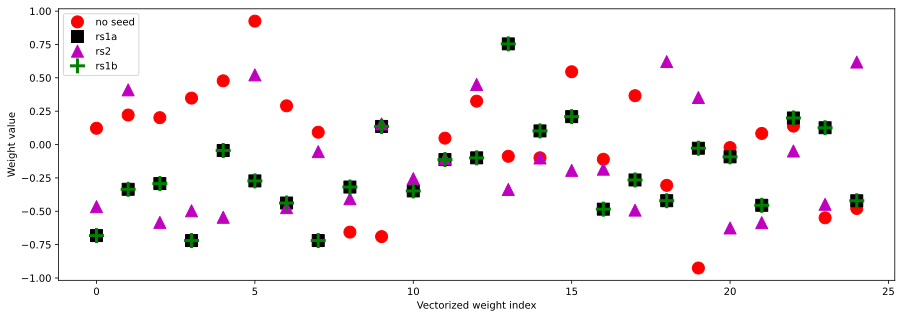

In [ ]:
# plotting

fig = plt.figure(figsize=(15,5))

plt.plot(w_ns,'ro',markersize=12,label='no seed')
plt.plot(w_1a,'ks',markersize=12,label='rs1a')
plt.plot(w_2 ,'m^',markersize=12,label='rs2')
plt.plot(w_1b,'g+',markersize=15,label='rs1b',markeredgewidth=3)
plt.legend()
plt.xlabel('Vectorized weight index')
plt.ylabel('Weight value')

plt.show()

In [ ]:
# the algebric test
print('1a-1b should be zeros:')
print(w_1a-w_1b)
print('\n\n')

print('1a-2 should be non-zeros:')
print( w_1a-w_2 )
print('\n\n')

print('1a-ns should be non-zeros:')
print( w_1a-w_ns )
print('\n\n')


1a-1b should be zeros:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]



1a-2 should be non-zeros:
[-0.21680683 -0.74543169  0.29078251 -0.22352022  0.50025801 -0.79460078
  0.03471264 -0.66646316  0.08751756 -0.01855947 -0.09211725 -0.0073103
 -0.55001713  1.09119886  0.20277754  0.40263602 -0.29967313  0.22609788
 -1.04223195 -0.37989978  0.53314489  0.12994796  0.2475912   0.57373706
 -1.03930008]



1a-ns should be non-zeros:
[-0.80421182 -0.55673541 -0.49398164 -1.06776175 -0.52242751 -1.1974085
 -0.72841126 -0.81193248  0.33785257  0.82565568 -0.0024772  -0.16037473
 -0.42448367  0.84251572  0.20159041 -0.33637579 -0.37414983 -0.6315982
 -0.11480442  0.89778905 -0.06973166 -0.53853001  0.06098653  0.67492399
  0.05793622]



